# Fraud Detection & ML Data Preparation

- Data Source: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/code
- Transaction Data Simulator: https://fraud-detection-handbook.github.io/fraud-detection-handbook/Chapter_3_GettingStarted/SimulatedDataset.html

#### Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#### Content
- Transactions made by credit cards in September 2013 by European cardholders in two days.
- There are 492 frauds out of 284,807 transactions. 
- The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

#### Pre-work
It contains only numerical input variables which are the result of a PCA transformation. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 

'Time' : contains the seconds elapsed between each transaction and the first transaction in the dataset. 
'Amount' : is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. 
'Class' : is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC) is recommended. Confusion matrix accuracy is not meaningful for unbalanced classification.

### 1. Import data and necessary libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load dataset
data = pd.read_csv("creditcard.csv")     
data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### 2. Data Cleaning 

In [2]:
# Separate features and target
# Class 1 signifies a fraudulent case. 
X = data.drop("Class", axis=1)
y = data["Class"]

# Split the dataset into training and testing sets
# 20% of the data will be used for testing, and the remaining 80% will be used for training.
# random_state = 10 ensures that the random number generator will start from the same point every time the code runs, producing the same sequence of random numbers.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)        

## Machine Learning Models
1. Random Forest Classifier 
2. Gradient Boosting Machines (GBM)
3. Support Vector Machines (SVM)
4. Neural Network (can consider if the dataset is larger)

### 1. Random Forest Classifier

##### Features and Advantages:
- Random Forest Classifier is an ensemble learning method used for classification tasks.
- Constructs multiple decision trees during training, each trained on a random subset of the training data and features.
- Diversity among trees reduces overfitting compared to individual trees.
- Predictions are aggregated through majority voting or averaging.
- Robust against overfitting and noise in data.
- Capable of capturing complex relationships and patterns.
- Highly interpretable due to feature importance analysis.

##### Why is it useful for fraud detection?:
- Widely used across various domains, including fraud detection.
- Efficiently detects fraudulent activities by learning from diverse and complex data patterns.
- Random Forest Classifier is a versatile and effective tool for classification tasks, particularly suitable for fraud detection applications due to its ability to handle complex data patterns and provide insights into feature importance.

Step 1: Train the random forest classifier.

In [3]:
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=10)

# n_estimators: Usually use k-fold cross validation to determine the values but for small to medium-sized datasets, 100 trees is sufficient to capture the underlying patterns in the data.
# Model Performance with more trees: Increasing the number of trees can lead to better model performance up to a certain point. However, beyond a certain threshold, the improvement in performance may become marginal, and additional only incurs computational cost.

# Train the model
rf_classifier.fit(X_train, y_train)     

RandomForestClassifier(random_state=10)

Step 2: Make predictions and evaluate the model.

In [4]:
# Make predictions on the test set
rf_pred = rf_classifier.predict(X_test)

# Evaluate the model
#[[TN FP]
# [FN TP]]
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
rf_classification = classification_report(y_test, rf_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print("Confusion Matrix:")
print(rf_conf_matrix)
print("\nClassification Report:")
print(rf_classification)
print("Accuracy Score:",rf_accuracy)   

analysis = '''
The model correctly predicted 56867 instances of the negative class.
There was 1 instance where the model incorrectly predicted the positive class when it was actually negative.
There were 19 instances where the model incorrectly predicted the negative class when it was actually positive.
The model correctly predicted 75 instances of the positive class. '''

print(analysis)

Confusion Matrix:
[[56867     1]
 [   17    77]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.99      0.82      0.90        94

    accuracy                           1.00     56962
   macro avg       0.99      0.91      0.95     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score: 0.9996839998595555

The model correctly predicted 56867 instances of the negative class.
There was 1 instance where the model incorrectly predicted the positive class when it was actually negative.
There were 19 instances where the model incorrectly predicted the negative class when it was actually positive.
The model correctly predicted 75 instances of the positive class. 


In [5]:
from sklearn.metrics import roc_auc_score

# Make predictions on the test set, predict probabilities for class 1
rf_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]  
#typically focus on the probabilities corresponding to the positive class (class 1) because we want to assess confidence that an instance is from class 1(fraud).

# Calculate the AUC-ROC score
rf_auc_roc = roc_auc_score(y_test, rf_pred_proba)
print("AUC-ROC Score:", rf_auc_roc)
# A score of 1 indicates a perfect classifier.
# A score of 0.5 suggests the classifier is performing no better than random guessing.
# A score above 0.5 indicates that the model is better than random guessing, with higher scores indicating better performance.

AUC-ROC Score: 0.9452166383068517


### 2. Gradient Boosting Machines (GBM)

##### Features and Advantages:
- Gradient Boosting Machines (GBM) is a powerful ensemble learning technique used for classification and regression tasks.
- It builds a strong predictive model by sequentially adding weak learners, typically decision trees, to the ensemble.
- Unlike Random Forest, GBM builds trees sequentially, with each tree aiming to correct the errors made by the previous ones.
- This iterative process allows GBM to focus more on difficult-to-predict instances, improving predictive accuracy.
- GBM is particularly effective at capturing complex relationships and non-linear patterns in the data.
- It handles both numerical and categorical features well and automatically selects the most informative features during training.
- Additionally, GBM provides flexibility in hyperparameter tuning, allowing practitioners to optimize model performance for specific tasks.

##### Why is it useful for fraud detection?:
- GBM is widely used across various domains, including fraud detection.
- It efficiently detects fraudulent activities by learning from diverse and complex data patterns.
- Gradient Boosting Machines offer a flexible and powerful tool for classification tasks, especially when dealing with imbalanced datasets and complex fraud patterns. Its robustness, high predictive power, and interpretability make it well-suited for fraud detection applications.

Step 1: Train the Gradient Boosting Classifier


In [6]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier

# Create the Gradient Boosting Machines 
gbm_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=10)
# Train the model
gbm_classifier.fit(X_train, y_train)


GradientBoostingClassifier(random_state=10)

Step 2: Make predictions and evaluate the model

In [7]:
# Make predictions on the test set
gbm_pred = gbm_classifier.predict(X_test)

# Evaluate the model
#[[TN FP]
# [FN TP]]
gbm_conf_matrix = confusion_matrix(y_test, gbm_pred)
gbm_classification = classification_report(y_test, gbm_pred)
gbm_accuracy = accuracy_score(y_test, gbm_pred)

print("Confusion Matrix:")
print(gbm_conf_matrix)
print("\nClassification Report:")
print(gbm_classification )
print("Accuracy Score:", gbm_accuracy)  

# AUC-ROC Score
gbm_pred_proba = gbm_classifier.predict_proba(X_test)[:, 1]
gbm_auc_roc = roc_auc_score(y_test, gbm_pred_proba)
print("AUC-ROC Score:", gbm_auc_roc)

Confusion Matrix:
[[56853    15]
 [   17    77]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.84      0.82      0.83        94

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score: 0.9994382219725431
AUC-ROC Score: 0.933837730227073


### 3. Support Vector Machines (SVM)

##### Features and Advantages:
- Support Vector Machines (SVM) is a versatile supervised learning algorithm used for classification and regression tasks.
- SVM works by finding the hyperplane that best separates the classes in the feature space while maximizing the margin between the classes.
- This hyperplane is determined by support vectors, which are the closest data points to the decision boundary.
- SVM can handle high-dimensional data effectively and is robust to overfitting, especially in cases with limited training data.
- SVM can utilize different kernel functions, such as linear, polynomial, and radial basis function (RBF) kernels, to capture complex relationships between features.

##### Why is it useful for fraud detection?:
- SVM is widely used across various domains, including fraud detection.
- It efficiently separates fraudulent transactions from legitimate ones, even in highly imbalanced datasets.
- Support Vector Machines offer a flexible and powerful tool for fraud detection, particularly in scenarios where linear separation is not sufficient and complex decision boundaries are needed. Its robustness, scalability, and ability to handle high-dimensional data make it well-suited for fraud detection applications.

Step 1: Train the Support Vector Classifier


In [8]:
from sklearn.svm import SVC

# Step 1: Train the Support Vector Classifier
svm_classifier = SVC(kernel='rbf', C=1.0, probability=True, random_state=10)

# Train the model
svm_classifier.fit(X_train, y_train)


SVC(probability=True, random_state=10)

 Step 2: Make predictions and evaluate the model

In [22]:
# Make predictions on the test set
svm_pred = svm_classifier.predict(X_test)

# Evaluate the model
#[[TN FP]
# [FN TP]]
svm_conf_matrix = confusion_matrix(y_test, svm_pred)
svm_classification = classification_report(y_test,svm_pred)
svm_accuracy = accuracy_score(y_test,svm_pred)

print("Confusion Matrix:")
print(svm_conf_matrix )

svm_analysis = '''
The SVM model correctly predicted 56868 instances of the negative class (non-fraudulent transactions) as true negatives.
The model incorrectly predicted 94 instances of the positive class (fraudulent transactions) as false negatives.
There were no instances predicted as false positives (fraudulent transactions incorrectly classified as non-fraudulent).
There were no instances predicted as true positives (correctly classified as fraudulent transactions).

This caused error in calculating precision and Fscore because  there are no predicted samples for the positive class
'''

print(svm_analysis)

print("\nClassification Report:")
print(svm_classification)
print("Accuracy Score:", svm_accuracy)  

# AUC-ROC Score
svm_pred_proba = svm_classifier.predict_proba(X_test)[:, 1]
svm_auc_roc = roc_auc_score(y_test, svm_pred_proba)
print("AUC-ROC Score:", svm_auc_roc)


C:\Users\yjkwak.2018\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yjkwak.2018\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\yjkwak.2018\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

Confusion Matrix:
[[56868     0]
 [   94     0]]

The SVM model correctly predicted 56868 instances of the negative class (non-fraudulent transactions) as true negatives.
The model incorrectly predicted 94 instances of the positive class (fraudulent transactions) as false negatives.
There were no instances predicted as false positives (fraudulent transactions incorrectly classified as non-fraudulent).
There were no instances predicted as true positives (correctly classified as fraudulent transactions).

This caused error in calculating precision and Fscore because  there are no predicted samples for the positive class


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.00      0.00      0.00        94

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962

Accuracy Score: 0.9983

## Model Comparisons
Find the most suitable model to be used for this fraud detection modelling. 

- The classification report provides detailed information about precision, recall, F1-score, and other metrics for each class, helping to understand how well the model performs for different classes. 
- The confusion matrix gives a concise summary of correct and incorrect predictions, allowing for the analysis of specific types of errors made by the model. 
- Accuracy provides an overall measure of correct predictions, but it may not be sufficient, especially in the case of imbalanced datasets.
- Additionally, the AUC-ROC Score evaluates the model's ability to discriminate between positive and negative classes across different thresholds, providing valuable insights into its performance. 

Considering multiple evaluation metrics provides a comprehensive understanding of the model's performance, aiding in informed decision-making and model refinement.

### Visualizing Accuracy:

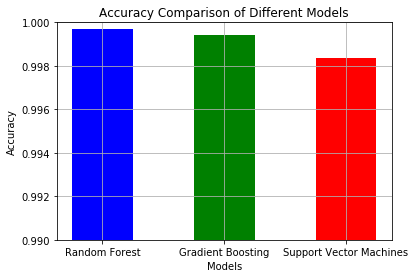

Best Model is Random Forest with Accuracy: 0.9996839998595555


In [31]:
#pip install matplotlib
import matplotlib.pyplot as plt

# Plotting the accuracy of each model
models = ['Random Forest', 'Gradient Boosting', 'Support Vector Machines']
accuracies = [rf_accuracy, gbm_accuracy, svm_accuracy]

plt.bar(models, accuracies, color=['blue', 'green', 'red'], width=0.5)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.ylim(0.99, 1.0)
plt.grid(True)
plt.show()

# Finding the best model based on accuracy
best_model = max(zip(['Random Forest', 'Gradient Boosting', 'Support Vector Machines'], [rf_accuracy, gbm_accuracy, svm_accuracy]), key=lambda x: x[1])
print("Best Model is", best_model[0], "with Accuracy:", best_model[1])

### Compare Confusion Matrix

In [34]:
print("\nRandom Forest Classifier Confusion Matrix:")
print(rf_conf_matrix)

print("\nGradient Boosting Machines Confusion Matrix:")
print(gbm_conf_matrix)

print("\nSupport Vector Machines Confusion Matrix:")
print(svm_conf_matrix)


Random Forest Classifier Confusion Matrix:
[[56867     1]
 [   17    77]]

Gradient Boosting Machines Confusion Matrix:
[[56853    15]
 [   17    77]]

Support Vector Machines Confusion Matrix:
[[56868     0]
 [   94     0]]


In [40]:
# Define the best model to be one with least number of FP & FN
rf_fp_fn = rf_conf_matrix[0, 1] + rf_conf_matrix[1, 0]
gbm_fp_fn = gbm_conf_matrix[0, 1] + gbm_conf_matrix[1, 0]
svm_fp_fn = svm_conf_matrix[0, 1] + svm_conf_matrix[1, 0]

# Return the index with the lowest sum of false positives and false negatives
best_model_idx = min(range(3), key=lambda i: [rf_fp_fn, gbm_fp_fn, svm_fp_fn][i])

# Print the confusion matrix of the best model
if best_model_idx == 0:
    print("\nBest Model: Random Forest Classifier")
    print("Confusion Matrix:")
    print(rf_conf_matrix)
elif best_model_idx == 1:
    print("\nBest Model: Gradient Boosting Machines")
    print("Confusion Matrix:")
    print(gbm_conf_matrix)
else:
    print("\nBest Model: Support Vector Machines")
    print("Confusion Matrix:")
    print(svm_conf_matrix)


Best Model: Random Forest Classifier
Confusion Matrix:
[[56867     1]
 [   17    77]]


### Compare Classification Report 

In [41]:
# Print classification report for Random Forest Classifier
print("Random Forest Classifier Classification Report:")
print(rf_classification)

# Print classification report for Gradient Boosting Machines
print("\nGradient Boosting Machines Classification Report:")
print(gbm_classification)

# Print classification report for Support Vector Machines
print("\nSupport Vector Machines Classification Report:")
print(svm_classification)


Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.99      0.82      0.90        94

    accuracy                           1.00     56962
   macro avg       0.99      0.91      0.95     56962
weighted avg       1.00      1.00      1.00     56962


Gradient Boosting Machines Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.84      0.82      0.83        94

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.91     56962
weighted avg       1.00      1.00      1.00     56962


Support Vector Machines Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56868
           1       0.00      0.00      0.00        94

    accuracy                       

In [42]:
# Parse precision, recall, and F1-score for each model
def parse_classification_report(report):
    lines = report.split('\n')
    data = {}
    for line in lines[2:-5]:  # Skip header and footer lines
        parts = line.split()
        if len(parts) > 0:
            class_name = parts[0]
            precision = float(parts[1])
            recall = float(parts[2])
            f1_score = float(parts[3])
            data[class_name] = {'precision': precision, 'recall': recall, 'f1-score': f1_score}
    return data

rf_metrics = parse_classification_report(rf_classification)
gbm_metrics = parse_classification_report(gbm_classification)
svm_metrics = parse_classification_report(svm_classification)

# Compare precision, recall, and F1-score for each class
classes = set(list(rf_metrics.keys()) + list(gbm_metrics.keys()) + list(svm_metrics.keys()))
for class_name in classes:
    print(f"Class: {class_name}")
    print(f"Random Forest: {rf_metrics.get(class_name, {}).get('precision', 0)}, {rf_metrics.get(class_name, {}).get('recall', 0)}, {rf_metrics.get(class_name, {}).get('f1-score', 0)}")
    print(f"Gradient Boosting: {gbm_metrics.get(class_name, {}).get('precision', 0)}, {gbm_metrics.get(class_name, {}).get('recall', 0)}, {gbm_metrics.get(class_name, {}).get('f1-score', 0)}")
    print(f"Support Vector Machines: {svm_metrics.get(class_name, {}).get('precision', 0)}, {svm_metrics.get(class_name, {}).get('recall', 0)}, {svm_metrics.get(class_name, {}).get('f1-score', 0)}")


Class: 1
Random Forest: 0.99, 0.82, 0.9
Gradient Boosting: 0.84, 0.82, 0.83
Support Vector Machines: 0.0, 0.0, 0.0
Class: 0
Random Forest: 1.0, 1.0, 1.0
Gradient Boosting: 1.0, 1.0, 1.0
Support Vector Machines: 1.0, 1.0, 1.0


### Compare AUC-ROC Score

In [43]:
# Print AUC-ROC scores for all three models
print("\nRandom Forest Classifier AUC-ROC Score:", rf_auc_roc)
print("Gradient Boosting Machines AUC-ROC Score:", gbm_auc_roc)
print("Support Vector Machines AUC-ROC Score:", svm_auc_roc)


Random Forest Classifier AUC-ROC Score: 0.9452166383068517
Gradient Boosting Machines AUC-ROC Score: 0.933837730227073
Support Vector Machines AUC-ROC Score: 0.46449130423721074
